# 🧩 STEP 1 — Import Required Libraries

In [2]:
# Importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For Machine Learning models and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')


# 🧩 STEP 2 — Load the Dataset

In [3]:
# Load the Uber dataset
df = pd.read_csv("uber.csv")   
print("Dataset loaded successfully!")
print("Total rows and columns:", df.shape)

# Display first few rows
df.head()


Dataset loaded successfully!
Total rows and columns: (200000, 9)


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


# 🧩 STEP 3 — Basic Information & Missing Values

In [4]:
# Show dataset information
df.info()

# Check for missing/null values
print("\nMissing values per column:")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB

Missing values per column:
Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64


# 🧩 STEP 4 — Clean Column Names & Drop Missing Values

In [5]:
# Convert column names to lowercase for consistency
df.columns = [c.strip().lower() for c in df.columns]

# Drop rows with missing important values
required_cols = ['fare_amount', 'pickup_datetime',
                 'pickup_longitude', 'pickup_latitude',
                 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']

df = df.dropna(subset=required_cols)
print("After dropping missing values:", df.shape)




After dropping missing values: (199999, 9)


### 1️⃣ df.columns
### df.columns gives a list of all column names in your dataset.

### 2️⃣ for c in df.columns
### This part means:
### “Go through each column name (c) in the list of column names.”
### So we are looping through each column name in the DataFrame.

### 3️⃣ c.strip()
### The .strip() function removes any extra spaces from the start and end of a string.

### 4️⃣ c.lower()
### The .lower() function converts the entire string to lowercase letters.

### -------------------------------------------------------------------------------------------

### required_cols = ['fare_amount', 'pickup_datetime',
###                 'pickup_longitude', 'pickup_latitude',
###                 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']
### What it means:
### These are the main columns we need to perform our prediction.
### If any of these columns have missing (NaN) values, that row cannot be used because the data is incomplete.

### df = df.dropna(subset=required_cols)
### How it works:
### The function .dropna() removes rows that contain missing (NaN) values.
### The subset argument tells pandas to check only the columns listed in required_cols.

# 🧩 STEP 5 — Convert Date & Extract Time Features

In [6]:
# Convert pickup_datetime to datetime type
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')

# Drop rows where conversion failed
df = df.dropna(subset=['pickup_datetime'])

# Extract date-time based features
df['pickup_year'] = df['pickup_datetime'].dt.year
df['pickup_month'] = df['pickup_datetime'].dt.month
df['pickup_day'] = df['pickup_datetime'].dt.day
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_dayofweek'] = df['pickup_datetime'].dt.dayofweek  # Monday = 0


### | pickup_datetime         |
### | ----------------------- |
### | 2009-06-15 17:26:21 UTC |
### | 2009-06-15 17:29:27 UTC |
### | 2009-06-15 17:33:26 UTC |

### So right now, these are text strings (not actual date/time objects).
### Python cannot directly calculate or extract hours, days, etc. from strings — we must convert them into a datetime format first.

### 🔍 What this line does:
### pd.to_datetime() — is a pandas function that converts strings to datetime objects.
### Example: "2009-06-15 17:26:21 UTC"  →  2009-06-15 17:26:21

### errors='coerce' means:
### If a value cannot be converted (for example, invalid date text),
### it will be replaced with NaT (Not a Time) instead of throwing an error.

### df = df.dropna(subset=['pickup_datetime']) = This removes any row where the datetime conversion failed (those that became NaT).
### Keeps our data clean and valid for time-based analysis.
## -----------------------------------------------------------------------------------------------------

### df['pickup_year'] = df['pickup_datetime'].dt.year 
### 🧠 Explanation:
### .dt.year extracts the year part from each date.
### Example:
### 2009-06-15 17:26:21 → 2009
### 🧩 New column created: pickup_year
### | pickup_datetime     | pickup_year |
### | ------------------- | ----------- |
### | 2009-06-15 17:26:21 | 2009        |
### | 2010-03-12 09:20:00 | 2010        |


# 🧩 STEP 6 — Calculate Distance Using Haversine Formula

In [7]:
# Function to calculate distance between two latitude/longitude points
def haversine(lat1, lon1, lat2, lon2):
    # Step 1: convert degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    # Step 2: calculate the differences
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    # Step 3: apply Haversine formula
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    
    # Step 4: multiply by Earth's radius (in km)
    km = 6371 * c
    return km

# Apply the function to each row
df['distance_km'] = haversine(df['pickup_latitude'], df['pickup_longitude'],
                              df['dropoff_latitude'], df['dropoff_longitude'])

### 🚗 Why do we need this?
### Because distance is the most important factor in deciding the fare amount.The longer the distance, the higher the fare — so the model must know how far the trip was.

### 🧮 What is the Haversine Formula?
### The Haversine formula calculates the shortest distance between two points on a sphere (the Earth), using their latitudes and longitudes.


# 🧩 STEP 7 — Filter Invalid or Unrealistic Data

In [8]:
# Remove rows with invalid values
df = df[df['fare_amount'] > 0]                 # fare should be positive
df = df[df['distance_km'] > 0.01]              # distance must be > 0
df = df[(df['passenger_count'] >= 1) & (df['passenger_count'] <= 6)]  # valid range 

print("After filtering invalid data:", df.shape)


After filtering invalid data: (193181, 15)


### 🔹 Line 1: Remove negative or zero fares

### df = df[df['fare_amount'] > 0]
### df['fare_amount'] > 0 creates a True/False mask for every row:
### True → fare > 0
### False → fare ≤ 0
### df[ ... ] keeps only the rows where the condition is True.
### So all rows with negative or zero fares are deleted.
## ------------------------------------------------------------------------------

### 🔹 Line 2: Remove rides with zero or almost zero distance
### df = df[df['distance_km'] > 0.01]
### Sometimes due to GPS error, both pickup and dropoff locations are same or extremely close — giving distance = 0 km.
### But still, fare might show nonzero (which doesn’t make sense).
### So we remove rows where distance_km ≤ 0.01 (i.e., 10 meters).
### This keeps only genuine rides where the car actually traveled.
## --------------------------------------------------------------------------------

### 🔹 Line 3: Keep valid passenger counts
### df = df[(df['passenger_count'] >= 1) & (df['passenger_count'] <= 6)]
### passenger_count should be a reasonable number.
### Normally Uber cars allow 1 to 6 passengers.
### Some rows may have wrong values due to typing or data errors (e.g., 0, 208, or -1).

### So we use a range filter with the & operator (AND condition):

### Greater than or equal to 1

### Less than or equal to 6

### Both conditions must be True to keep the ro

# 🧩 STEP 8 — Identify and Remove Outliers (IQR Method)

In [9]:
# 🧩 Step 8 — Identify and Remove Outliers (IQR Method)

def remove_outliers(df, column):
    # Step 1: Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    # Step 2: Compute the Interquartile Range (IQR)
    IQR = Q3 - Q1
    
    # Step 3: Define lower and upper limits
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Step 4: Keep only rows within the limits
    df = df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]
    
    return df

# Apply to both 'fare_amount' and 'distance_km'
df = remove_outliers(df, 'fare_amount')
df = remove_outliers(df, 'distance_km')

print("✅ After removing all outliers:", df.shape)


✅ After removing all outliers: (168722, 15)


# 🧩 STEP 9 — Check Correlation Between Features

In [10]:
# Select important columns
corr_cols = ['fare_amount', 'distance_km', 'passenger_count',
             'pickup_hour', 'pickup_dayofweek', 'pickup_month']

# Compute correlation matrix
corr = df[corr_cols].corr()
print(corr)


                  fare_amount  distance_km  passenger_count  pickup_hour  \
fare_amount          1.000000     0.796749         0.016687     0.006732   
distance_km          0.796749     1.000000         0.005309    -0.013366   
passenger_count      0.016687     0.005309         1.000000     0.016979   
pickup_hour          0.006732    -0.013366         0.016979     1.000000   
pickup_dayofweek     0.013018     0.036868         0.036964    -0.083811   
pickup_month         0.032958     0.007414         0.007917    -0.003302   

                  pickup_dayofweek  pickup_month  
fare_amount               0.013018      0.032958  
distance_km               0.036868      0.007414  
passenger_count           0.036964      0.007917  
pickup_hour              -0.083811     -0.003302  
pickup_dayofweek          1.000000     -0.009912  
pickup_month             -0.009912      1.000000  


### 🔸 Line 1: Selecting columns
### We pick only numeric columns because correlation works on numerical data only.
### Here, we include:
### fare_amount → our target
### distance_km, passenger_count, pickup_hour, pickup_dayofweek, pickup_month → features

### 🔸 Line 2: .corr()
### df.corr() automatically calculates pairwise correlation between all numeric columns using Pearson correlation (default method).
### It creates a matrix (table) where each cell [i, j] shows the correlation between variable i and variable j.

### 💡 Why this step is useful
### Feature Selection – If one feature (like distance) shows strong correlation with fare, we know it’s important for prediction.
### Detect Redundancy – If two features are very highly correlated (e.g., pickup_hour and another time feature), we might keep only one.
### Model Understanding – Correlation gives us intuition about data before fitting complex models.

# 🧩 STEP 10 — Prepare Data for Model Training

In [11]:
# Select features and target
features = ['distance_km', 'passenger_count', 'pickup_hour',
            'pickup_dayofweek', 'pickup_month']
target = 'fare_amount'

X = df[features]
y = df[target]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print("Training size:", X_train.shape)
print("Testing size :", X_test.shape)
# Divides data into 80% training and 20% testing for model evaluation.

Training size: (134977, 5)
Testing size : (33745, 5)


# 🧩 STEP 11 — Train Linear Regression Model

In [13]:
# Create and train Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predict on test data
y_pred_lr = lr.predict(X_test)


# 🧩 STEP 12 — Train Random Forest Regression Model

In [14]:
# Create and train Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf.predict(X_test)

# Random Forest combines many decision trees → gives better accuracy and handles non-linear data well.

# 🧩 STEP 13 — Evaluate and Compare Models

In [15]:
# Define evaluation function
def evaluate_model(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    return r2, rmse, mae

# Linear Regression results
r2_lr, rmse_lr, mae_lr = evaluate_model(y_test, y_pred_lr)

# Random Forest results
r2_rf, rmse_rf, mae_rf = evaluate_model(y_test, y_pred_rf)

# Display comparison
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'R2 Score': [r2_lr, r2_rf],
    'RMSE': [rmse_lr, rmse_rf],
    'MAE': [mae_lr, mae_rf]
})
results


,Model,R2 Score,RMSE,MAE
0,Linear Regression,0.641562,2.230031,1.610889
1,Random Forest,0.624853,2.281416,1.651961


### 🧠 Explanation:

### R² (Coefficient of determination) → how much variance is explained by model (higher = better)

### RMSE (Root Mean Square Error) → lower means better accuracy

### MAE (Mean Absolute Error) → average absolute difference between predicted and actual fare

# 🧩 STEP 14 — Visual Comparison of Predictions

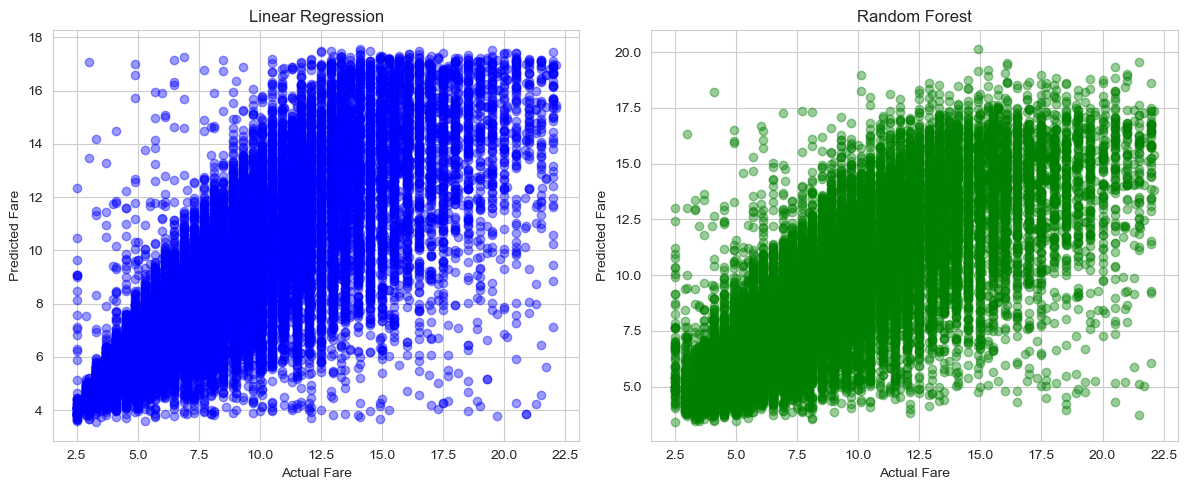

In [65]:
plt.figure(figsize=(12,5))

# Linear Regression
plt.subplot(1,2,1)
plt.scatter(y_test, y_pred_lr, alpha=0.4, color='blue')
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Linear Regression")

# Random Forest
plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_rf, alpha=0.4, color='green')
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Random Forest")

plt.tight_layout()
plt.show()
